# Goal
The aim of this project is to determine the best combination of features (one qualitative feature and two quantitative features) of the penguins to predict the species of a penguin.

In [86]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split

In [87]:
!curl -O https://raw.githubusercontent.com/JiayunMeng/group_project_pic16a/main/penguins.py
%run penguins.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5884  100  5884    0     0   113k      0 --:--:-- --:--:-- --:--:--  114k


# Preparation of Data
First, we import the data frame and take a quik look at it.

In [88]:
penguins = pd.read_csv('https://raw.githubusercontent.com/JiayunMeng/group_project_pic16a/main/palmer_penguins.csv')
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


By exploring the data a little, we see that all penguins are in the same `Region` and the same `Stage`. At the same time, `studyName`, `Sample Number`, `Individual ID`, and `Data Egg` are intuitively irrelevant to species. As a result, we delete all above columns and then delete every samples still with `NaN` value.

Also, one of the sample has `.` as `Sex`. This is very weird. We delete this sample as well.

Finally, we transform `Clutch Completion`, `Sex`, `Island`, and `Species` to numerical values and shortened the name of the species.

For your information, the function `prep_data` is designed for these.

In [89]:
df = prep_data(penguins)
df.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,0,2,1,39.5,17.4,186.0,3800.0,0,8.94956,-24.69454
2,0,2,1,40.3,18.0,195.0,3250.0,0,8.36821,-25.33302
4,0,2,1,36.7,19.3,193.0,3450.0,0,8.76651,-25.32426
5,0,2,1,39.3,20.6,190.0,3650.0,1,8.66496,-25.29805
6,0,2,0,38.9,17.8,181.0,3625.0,0,9.18718,-25.21799


The qualitative features are `Island` and `Sex`, while the rest are quantitative features.

# Combinations of Features
Next, we determine all possible combination of one qualitative feature and two quantitative features as follows.

In [90]:
col = list(df.drop('Species', axis = 1).columns)
# col is a list of all predictor features
comb = list(combinations(col, 3))
# comb is a list of all combinations of three predictor features
comb = [c for c in comb if (('Island' in c or 'Sex' in c) and ('Island' not in c or 'Sex' not in c))]
# comb is a list of all combinations of one qualitative feature and two quantitative features

The combinations are stored as tuples. Mathematically, we have 42 possible combinations. This can be used as a quick check.

In [91]:
print(comb[0])
print(len(comb))

('Island', 'Clutch Completion', 'Culmen Length (mm)')
42


# The Best Combination
In this section, we introduce a class `pred_alg_comb`. The initial values of the class are a training set, a testing set, an algorithm name, and all combinations used for prediction. The algorithms are restricted to Random Forest `rf` and Gradient Boosting `gb`. The will be a value error if other algorithms are entered.

In [92]:
X = df.drop(['Species'], axis = 1)
y = df['Species']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
pred_alg_comb(X_train, y_train, X_test, y_test, 'f', comb)

ValueError: The algorithm should be either Random Forest or Gradient Boosting.

Now we define an instance of `pred_alg_comb` with algorithm as Gradient Boosting and explore the three functions of the class.

In [95]:
gb = pred_alg_comb(X_train, y_train, X_test, y_test, 'gb', comb)

The first function we explore is `model`. The input is a combination of predictor features and the function will return the model trained by the predictor features and the mean cross validation score of the model. The following is an example.

In [96]:
pred_features = ['Sex', 'Culmen Depth (mm)', 'Clutch Completion']
alg, score = gb.model(pred_features)

In [97]:
alg.score(X_test[pred_features], y_test)

0.7551020408163265

For the function `model`, we check if the number of input features are three and if the input features are predictor features.

In [98]:
pred_features = ['Sex', 'Culmen Depth (mm)']
gb.model(pred_features)

ValueError: Three predictor features should be entered.

In [ ]:
pred_features = ['Sex', 'Culmen Depth (mm)', 'Species']
gb.model(pred_features)

The second function of the class `pred_alg_comb` is `find_features`. It helps determine the combination of predictor values that trains the best model with the help of cross validation. The function returns the best model and the best combination.

In [99]:
best_comb_gb, best_model_gb = gb.find_features()

In [100]:
print(best_comb_gb)

('Island', 'Culmen Length (mm)', 'Flipper Length (mm)')


It worths noticing that the best combination and the best model are stored as values of `gb`.

In [101]:
gb.best_comb

('Island', 'Culmen Length (mm)', 'Flipper Length (mm)')

In [102]:
gb.best_model

GradientBoostingClassifier(n_estimators=40)

The third function is `score_test`. It gives the score that represents how well the best model performs on the testing set. As the best model is a value of `gb`, no input is required.

In [103]:
gb.score_test()

0.9693877551020408

Similarly, we determine the best combination with respect to the algorithm Random Forest and check how well the best model performs.

In [104]:
rf = pred_alg_comb(X_train, y_train, X_test, y_test, 'rf', comb)
best_comb_rf, best_model_rf = rf.find_features()
score_rf = rf.score_test()

In [105]:
print(best_comb_rf)
print(score_rf)

('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')
0.9795918367346939


# Check the Model
At the end, we explore the data a bit. Though the best combination varies as the splitting of the training and testing sets varies and the Random Forest testing itself gives different results each time, we can see some predictor features are relevant to the target feature `Species` by eyes.

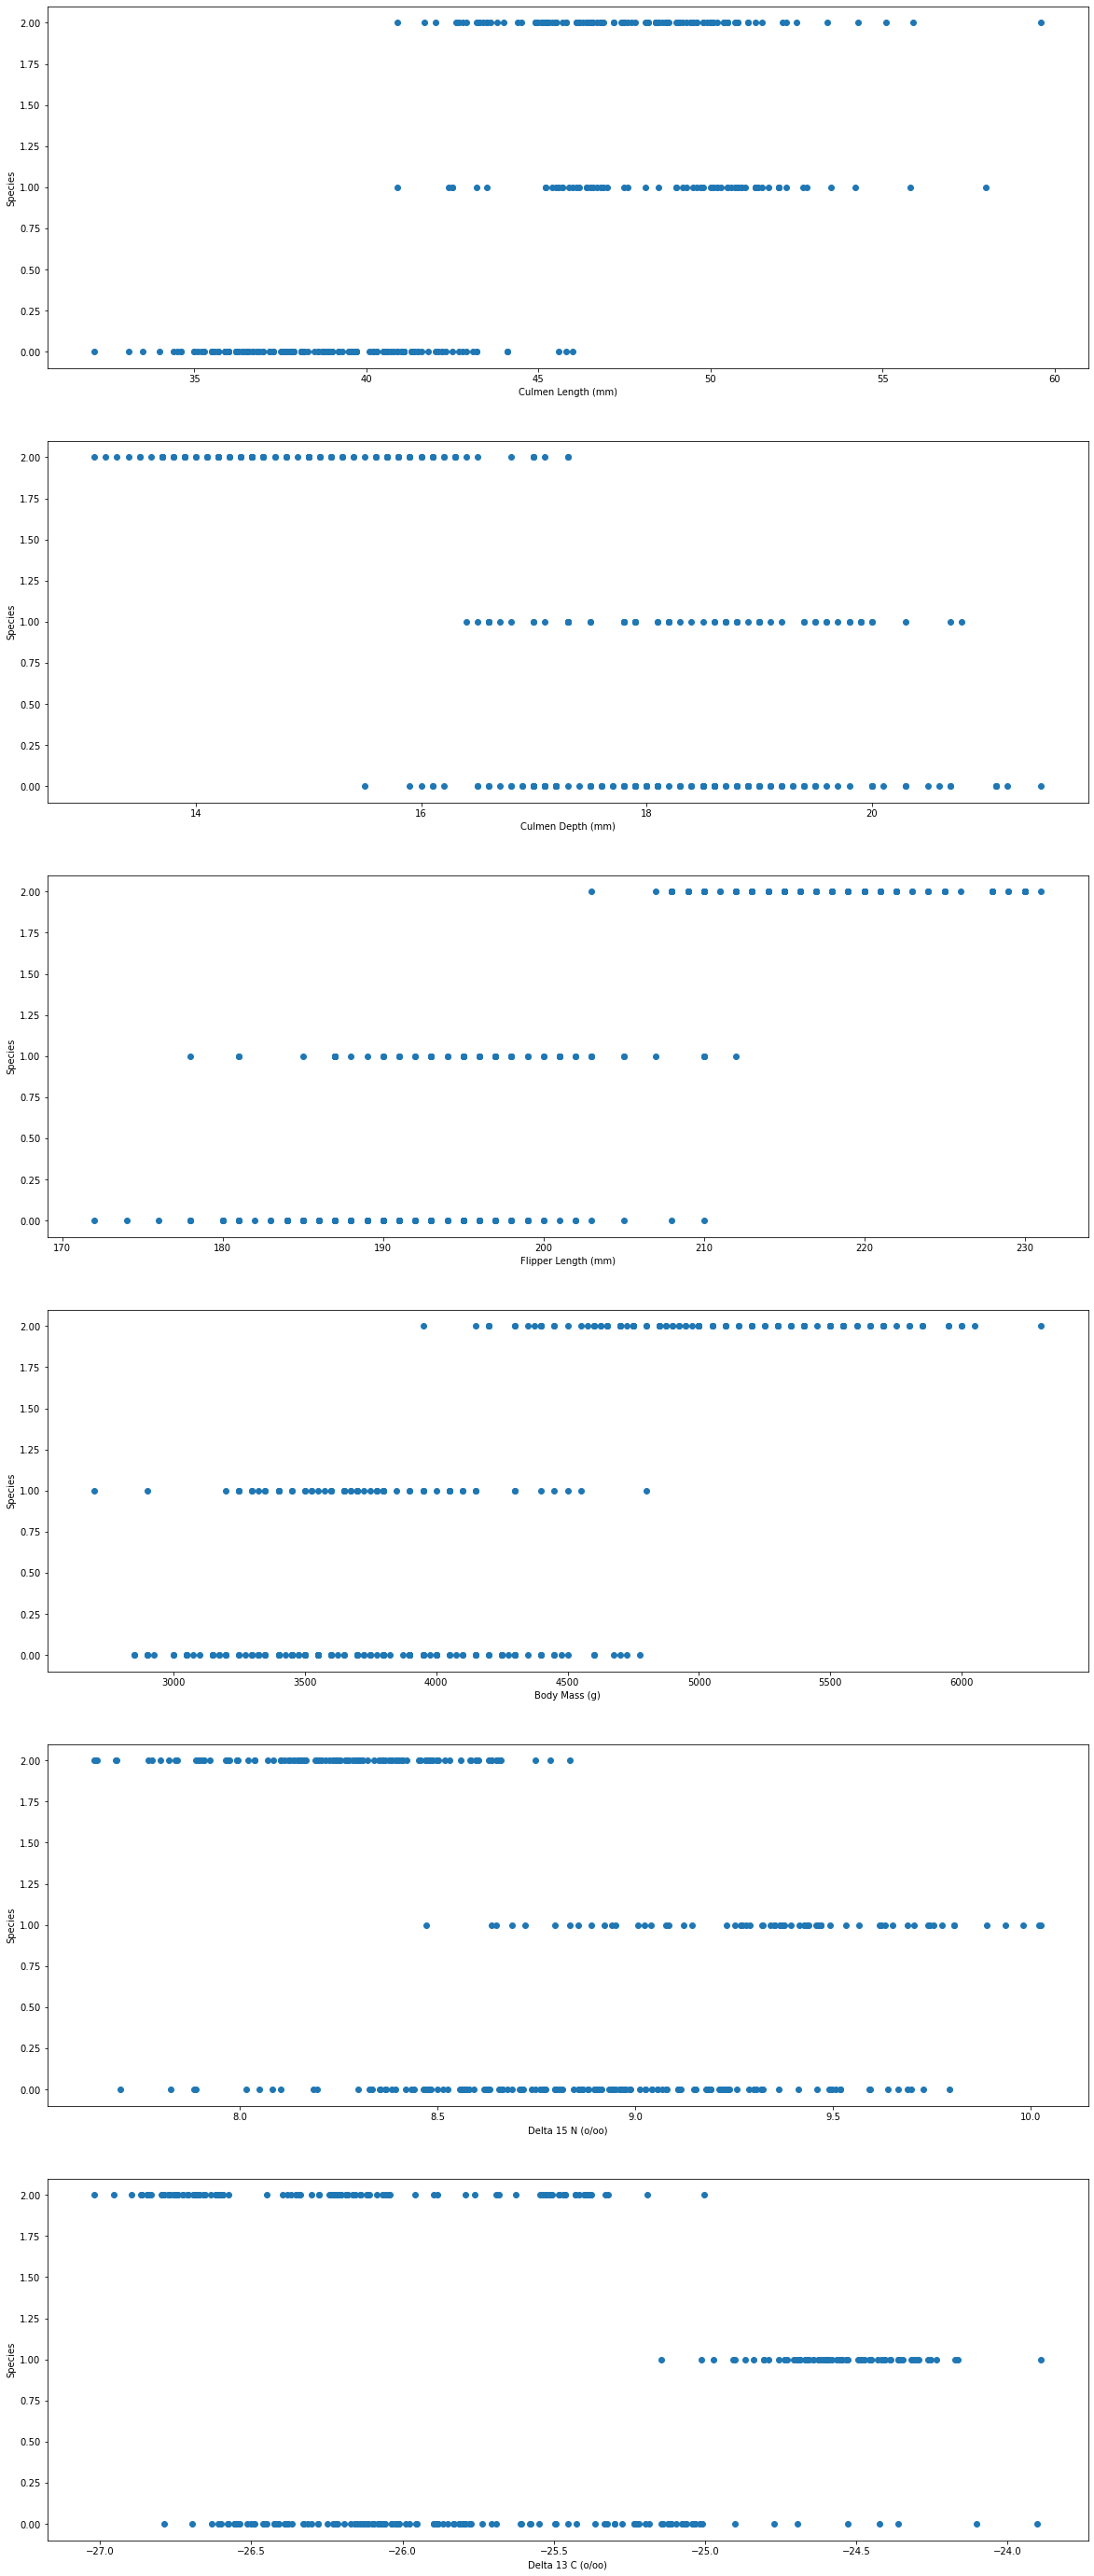

In [106]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
plot_graph(df, features, 'Species')

If we zoom into some predictor features, we can see the data of a species can be very different from the data of the other two. The `Culmen Length (mm)` of species 0 is greatly shorter than species 1 and 2, while the `Culmen Depth (mm)` of Species 2 is greatly shallower than species 0 and 1. In fact, we can see these pattern in the plot of `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)` and `Body Mass (g)`. 

On the other hand, `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` can help us exclude a species. For example, if a penguin has a very low `Delta 15 N (o/oo)`, then it is not likely to be species 1.

As the data itself is very great, it is reasonable that the prediction made by the best model performs very well.

### Gradient Boosting 

('Island', 'Culmen Length (mm)', 'Flipper Length (mm)')


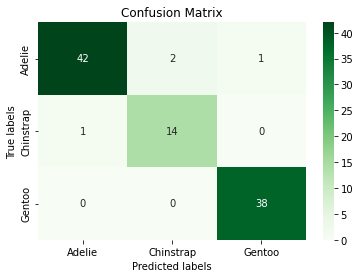

In [107]:
print(best_comb_gb)
best_model_gb.fit(X_train,y_train)
plot_confusion_matrix(best_model_gb,X_test, y_test)

From the above confusion matrix, it seems like our raondom forest model with combination features 'Island', 'Culmen Length (mm)', 'Flipper Length (mm)' is good because the prediction is wrong only four times.

Note: Since the splitting of the training and testing sets varies and the Random Forest testing itself gives different results each time, the features, scores and confusion matrix would be different.

### Random Forest

('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)')


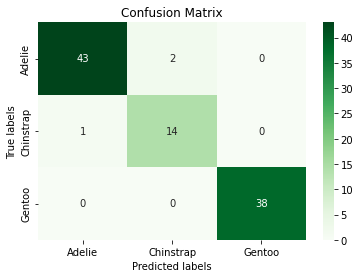

In [108]:
print(best_comb_rf)
best_model_rf.fit(X_train,y_train)
plot_confusion_matrix(best_model_rf,X_test, y_test)

From the above confusion matrix, it seems like our raondom forest model with combination features 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)' is good because the prediction is wrong only three times.

Note: Since the splitting of the training and testing sets varies and the Random Forest testing itself gives different results each time, the features, scores and confusion matrix would be different.

# Conclusion
Thank you very much for reading our demo file! After we determine the best combination of features with Gradient Boosting and Random Forest, and check the model accuracy, which is quite good. We believe our aim of this project is achieved!